In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


## Part 1 — Data Loading and Exploration ##

### 1) Load data ##

In [44]:
from pathlib import Path

DATA_DIR = Path("../data")  # if notebook is inside notebooks/
# If you're in Colab, you might use "/content/..." instead

header_path = DATA_DIR / "STONYBRK_20240531_HEADER.csv"
line_path   = DATA_DIR / "STONYBRK_20240531_LINE.csv"
code_path   = DATA_DIR / "STONYBRK_20240531_CODE.csv"

df_header = pd.read_csv(header_path)
df_line   = pd.read_csv(line_path)
df_code   = pd.read_csv(code_path)

df_header.head(), df_line.head(), df_code.head()


(   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI              BillingProvFirstName  BillingProvLastName  \
 0        49            35216986         P          1154376309  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
 1        49            35235657         P          1154376309  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
 2        49            35249003         P          1154376309  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
 3        49            35249014         P          1154376309  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
 4        49            35249016         P          1154376309  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
 
    AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  RenderingProviderNPI RenderingProvFirstName  \
 0                   NaN                    NaN                   NaN            1902082209               YUEHJIEN   
 1                   NaN            

### 2) Quick exploration helper (shape, dtypes, missing, stats) ###

In [45]:
def explore_df(df, name):
    print(f"===== {name} =====")
    print("Shape:", df.shape)
    display(df.head())
    print("\nDtypes:")
    display(df.dtypes.to_frame("dtype"))
    print("\nMissing values:")
    display(df.isna().sum().to_frame("missing_count").sort_values("missing_count", ascending=False))
    print("\nNumeric describe:")
    display(df.select_dtypes(include="number").describe().T)

explore_df(df_header, "HEADER")
explore_df(df_line, "LINE")
explore_df(df_code, "CODE")


===== HEADER =====
Shape: (388, 43)


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,RenderingProvFirstName,RenderingProvLastName,ReferringProviderNPI,ReferringProvFirstName,ReferringProvLastName,OperatingProviderNPI,OperatingProvFirstName,OperatingProvLastName,ServiceFromDate,ServiceToDate,PrimaryPayerName,PrimaryPayerCode,PrimaryPayerCFI,SecondaryPayer,SecondaryPayerCode,SecondaryPayerCFI,TertianaryPayer,TertianaryPayerCode,TertianaryPayerCFI,DRG,AdmitType,DischargeStatus,AdmitDx,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/25/23 0:00,9/25/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,1.467416e+09,DAVID,FIORELLA -PHD,NaN,NaN,NaN,9/27/23 0:00,9/27/23 0:00,AETNA,147,AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,UNITED COMMUNITY PLAN GOVT PROGRAM,405,UA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/29/23 0:00,9/29/23 0:00,MMIS,104,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,YUEHJIEN,GU,NaN,NaN,NaN,NaN,NaN,NaN,9/28/23 0:00,9/28/23 0:00,EMPIRE BLUE HMO,94,BL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN



Dtypes:


,dtype
ClientId,int64
ProspectiveClaimId,int64
ClaimType,object
BillingProviderNPI,int64
BillingProvFirstName,object
BillingProvLastName,float64
AttendingProviderNPI,float64
AttendingProvFirstName,object
AttendingProvLastName,object
RenderingProviderNPI,int64



Missing values:


,missing_count
ReferralNo,388
AdmitType,388
TertianaryPayerCFI,388
TertianaryPayerCode,388
TertianaryPayer,388
SecondaryPayerCFI,388
SecondaryPayerCode,388
SecondaryPayer,388
DischargeStatus,388
AdmitDx,388



Numeric describe:


,count,mean,std,min,25%,50%,75%,max
ClientId,388.0,4.900000e+01,0.000000e+00,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
ProspectiveClaimId,388.0,3.670543e+07,3.562317e+05,3.521699e+07,3.669166e+07,3.683352e+07,3.688171e+07,3.700149e+07
BillingProviderNPI,388.0,1.462851e+09,3.247005e+08,1.063469e+09,1.154376e+09,1.437106e+09,1.821036e+09,1.982659e+09
BillingProvLastName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AttendingProviderNPI,2.0,1.472878e+09,6.069869e+08,1.043673e+09,1.258275e+09,1.472878e+09,1.687480e+09,1.902082e+09
RenderingProviderNPI,388.0,1.565732e+09,2.863497e+08,1.003467e+09,1.295152e+09,1.467003e+09,1.902082e+09,1.992124e+09
ReferringProviderNPI,87.0,1.538206e+09,2.676761e+08,1.003264e+09,1.391558e+09,1.518953e+09,1.780521e+09,1.992068e+09
OperatingProviderNPI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingProvFirstName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingProvLastName,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


===== LINE =====
Shape: (520, 28)


,ClientId,ProspectiveClaimId,LinePos,RevCode,HCPCS,Modifier1,Modifier2,Modifier3,Modifier4,DxMapDelim,DxMap1,DxMap2,DxMap3,DxMap4,ServiceDate,ServiceThruDate,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId,CodeName,ClientProcedureCode,ClientProcedureName
0,49,35216986,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/25/2023,09/25/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
1,49,35235657,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/27/2023,09/27/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
2,49,35244774,1,NaN,99291,GC,25,NaN,NaN,"1,2,3,4,5,6,7,8,9,10",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
3,49,35249003,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/28/2023,09/28/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"
4,49,35249014,1,NaN,99291,GC,NaN,NaN,NaN,"1,2,3,4,5,6",1,2.0,3.0,4.0,09/29/2023,09/29/2023,1,1155,21,NaN,NaN,NaN,NaN,NaN,4,TESNJ,9699291,"CRITICAL CARE, INITIAL FIRST HOUR"



Dtypes:


,dtype
ClientId,int64
ProspectiveClaimId,int64
LinePos,int64
RevCode,float64
HCPCS,object
Modifier1,object
Modifier2,object
Modifier3,float64
Modifier4,float64
DxMapDelim,object



Missing values:


,missing_count
NDC,520
NDCUnits,520
RevCode,520
NDCRx,520
Modifier3,520
Modifier4,520
NDCUnitQualifier,520
RenderingProvNPI,520
Modifier2,482
DxMap4,353



Numeric describe:


,count,mean,std,min,25%,50%,75%,max
ClientId,520.0,4.900000e+01,0.000000,49.0,49.00,49.0,49.0,49.0
ProspectiveClaimId,520.0,3.672637e+07,327883.675965,35216986.0,36699456.75,36831015.5,36881711.0,37001489.0
LinePos,520.0,1.401923e+00,0.861282,1.0,1.00,1.0,2.0,7.0
RevCode,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modifier3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modifier4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DxMap1,520.0,1.150000e+00,0.576181,1.0,1.00,1.0,1.0,6.0
DxMap2,340.0,2.082353e+00,0.433461,1.0,2.00,2.0,2.0,6.0
DxMap3,232.0,3.064655e+00,0.446391,1.0,3.00,3.0,3.0,7.0
DxMap4,167.0,4.017964e+00,0.445500,1.0,4.00,4.0,4.0,8.0


===== CODE =====
Shape: (1536, 9)


,ClientId,ProspectiveClaimId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,36752505,ABF,3,G93.6,NaN,NaN,NaN,NaN
1,49,36819490,ABF,4,N17.9,NaN,NaN,NaN,NaN
2,49,35352862,ABF,2,G06.1,NaN,NaN,NaN,NaN
3,49,35244774,ABF,10,G90.8,NaN,NaN,NaN,NaN
4,49,36745815,ABK,1,I77.819,NaN,NaN,NaN,NaN



Dtypes:


,dtype
ClientId,int64
ProspectiveClaimId,int64
CodeQualifier,object
CodePos,int64
CodeValue,object
CodeFromDate,float64
CodeToDate,float64
CodeAmnt,float64
POAInd,float64



Missing values:


,missing_count
CodeFromDate,1536
CodeToDate,1536
CodeAmnt,1536
POAInd,1536
ClientId,0
ProspectiveClaimId,0
CodeQualifier,0
CodePos,0
CodeValue,0



Numeric describe:


,count,mean,std,min,25%,50%,75%,max
ClientId,1536.0,4.900000e+01,0.000000,49.0,49.0,49.0,49.0,49.0
ProspectiveClaimId,1536.0,3.655962e+07,470630.959446,35216986.0,36465551.0,36752505.0,36860231.0,37001489.0
CodePos,1536.0,3.666016e+00,2.735657,1.0,1.0,3.0,5.0,12.0
CodeFromDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodeToDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CodeAmnt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POAInd,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Convert dates + basic dataset observations

In [46]:
# Convert service dates with explicit format to avoid warnings
date_cols = ["ServiceFromDate", "ServiceToDate"]

for c in date_cols:
    if c in df_header.columns:
        df_header[c] = pd.to_datetime(
            df_header[c],
            format="%m/%d/%y %H:%M",
            errors="coerce"
        )

# Unique claims
unique_claims = df_header["ProspectiveClaimId"].nunique()
print("Unique claims in HEADER:", unique_claims)

# Date range
print(
    "ServiceFromDate range:",
    df_header["ServiceFromDate"].min().date(),
    "to",
    df_header["ServiceFromDate"].max().date()
)


Unique claims in HEADER: 388
ServiceFromDate range: 2023-09-25 to 2024-05-29


### 4) Lines per claim + Dx codes per claim

In [47]:
lines_per_claim = df_line.groupby("ProspectiveClaimId")["LinePos"].count()
dx_per_claim    = df_code.groupby("ProspectiveClaimId")["CodePos"].count()

print("Avg service lines per claim:", round(lines_per_claim.mean(), 2))
print("Median service lines per claim:", round(lines_per_claim.median(), 2))

print("Avg diagnosis codes per claim:", round(dx_per_claim.mean(), 2))
print("Median diagnosis codes per claim:", round(dx_per_claim.median(), 2))


Avg service lines per claim: 1.34
Median service lines per claim: 1.0
Avg diagnosis codes per claim: 3.96
Median diagnosis codes per claim: 3.0


### Markdown (Observations)

- There are 388 unique claims in the dataset, with one row per claim in the HEADER file.

- Service dates range from September 25, 2023 to May 29, 2024, covering approximately eight months of claims activity.

- Claims contain about 1.34 service lines on average, with a median of 1, indicating that most claims include a single billed service.

- Claims contain about 3.96 diagnosis codes on average, with a median of 3, suggesting that many claims include multiple documented diagnoses.

- Several fields show systematic missingness, including secondary and tertiary payer information, operating provider fields, and certain admission-related variables. These missing values appear consistent across claims and likely reflect the scope and structure of this claims extract rather than data quality errors.

## Part 2 — Relational Data Analysis

### Question 1: Provider Analysis (Top 5 billing providers by # claims)

In [48]:
# Create a consistent provider name column
df_header["BillingProviderName"] = df_header["BillingProvFirstName"]

# Adjust these to match your HEADER columns
billing_npi_col = "BillingProviderNPI"
billing_name_col = "BillingProviderName"

cols_to_use = [billing_name_col, billing_npi_col]

provider_counts = (
    df_header[cols_to_use]
    .dropna(subset=[billing_npi_col])
    .groupby(cols_to_use, dropna=False)
    .size()
    .reset_index(name="claim_count")
    .sort_values("claim_count", ascending=False)
    .head(5)
)

display(provider_counts)

,BillingProviderName,BillingProviderNPI,claim_count
3,SB INTERNISTS,1821035601,152
5,SB SURGICAL ASSOCIATES,1063468536,81
0,NEW YORK SPINE AND BRAIN SURGERY,1154376309,69
6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,1538114723,40
4,SB PSYCHIATRIC ASSOCIATES,1437105905,36


#### Interpretation

The billing provider analysis shows that SB Internists accounts for the largest share of claims, contributing 152 claims (approximately 39% of the total). This is expected for an internal medicine group that manages a high volume of general inpatient and follow-up care. Surgical Associates and Spine & Brain Surgery are the next most frequent billing providers, indicating a substantial volume of procedural and specialty care at the hospital. Overall, claim volume is concentrated among a small number of high-utilization providers.

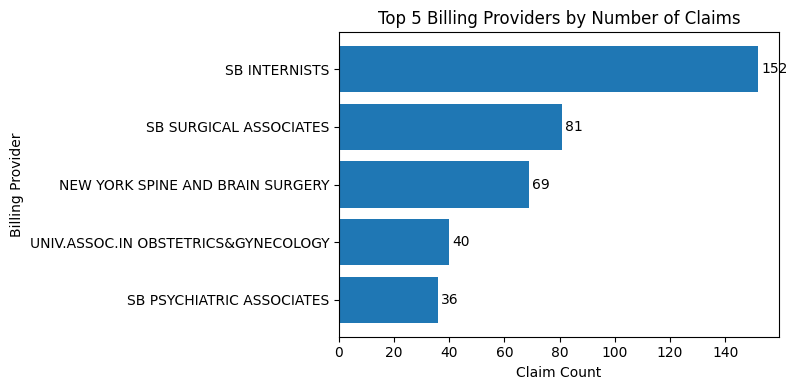

In [49]:
plt.figure(figsize=(8,4))
bars = plt.barh(
    provider_counts["BillingProviderName"],
    provider_counts["claim_count"]
)

plt.xlabel("Claim Count")
plt.ylabel("Billing Provider")
plt.title("Top 5 Billing Providers by Number of Claims")

# Largest at top
plt.gca().invert_yaxis()

# Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va="center"
    )

plt.tight_layout()
plt.show()


### Question 2: Payer Mix Analysis

In [50]:
payer_col = "PrimaryPayerName"

payer_counts = (
    df_header[payer_col]
    .fillna("UNKNOWN")
    .value_counts()
    .reset_index()
)
payer_counts.columns = [payer_col, "claim_count"]

total_claims = payer_counts["claim_count"].sum()
payer_counts["pct_of_claims"] = payer_counts["claim_count"] / total_claims * 100

top5_payers = payer_counts.head(5)
display(top5_payers)

,PrimaryPayerName,claim_count,pct_of_claims
0,MEDICARE,242,62.371134
1,HEALTHFIRST FFS,46,11.855670
2,FIDELIS/BETTER HEALTH PLAN,26,6.701031
3,HIP MEDICAID,17,4.381443
4,HEALTHFIRST CAPITATED,10,2.577320


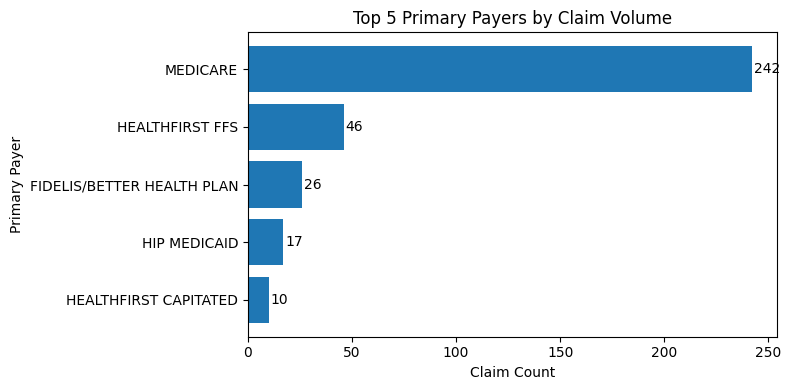

In [51]:
plt.figure(figsize=(8,4))
bars = plt.barh(
    top5_payers["PrimaryPayerName"],
    top5_payers["claim_count"]
)

plt.xlabel("Claim Count")
plt.ylabel("Primary Payer")
plt.title("Top 5 Primary Payers by Claim Volume")

plt.gca().invert_yaxis()

# Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va="center"
    )

plt.tight_layout()
plt.show()


#### Interpretation

Medicare is the dominant primary payer, accounting for approximately 62.4% of claims, which is typical for an academic medical center serving an older patient population. Medicaid-related payers (including Healthfirst, Fidelis, and HIP) together represent roughly one quarter of claims, highlighting the hospital’s role in caring for underserved and publicly insured populations. Commercial payers make up a relatively small proportion of claims in this dataset, suggesting this sample is skewed toward government-insured patients.

### Question 3: Common Diagnoses

In [52]:
dx_col = "CodeValue"

top10_dx = (
    df_code[dx_col]
    .fillna("UNKNOWN")
    .value_counts()
    .head(10)
    .reset_index()
)
top10_dx.columns = ["ICD10_Code", "frequency"]
display(top10_dx)


,ICD10_Code,frequency
0,J96.01,62
1,E78.5,49
2,I10,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


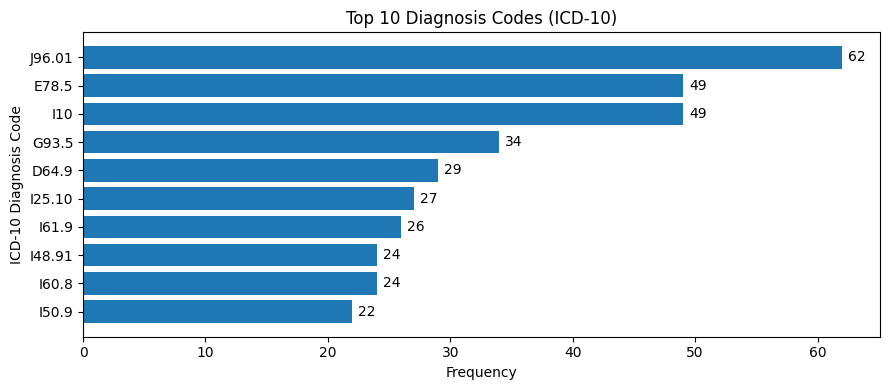

In [53]:
plt.figure(figsize=(9,4))
bars = plt.barh(
    top10_dx["ICD10_Code"],
    top10_dx["frequency"]
)

plt.xlabel("Frequency")
plt.ylabel("ICD-10 Diagnosis Code")
plt.title("Top 10 Diagnosis Codes (ICD-10)")
     
# Put highest frequency at the top
plt.gca().invert_yaxis()

# Add frequency labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va="center"
    )

plt.tight_layout()
plt.show()


#### Interpretation

The most frequent diagnosis codes indicate a patient population with significant medical complexity. Acute respiratory failure (J96.01) appears most frequently, reflecting a high level of critical illness. Cardiovascular conditions such as hypertension, heart disease, heart failure, and atrial fibrillation are common, consistent with inpatient medical care. Neurological diagnoses, including brain compression and intracranial hemorrhage, also appear frequently, aligning with the presence of Spine & Brain Surgery providers. In addition, chronic conditions such as hyperlipidemia and anemia are common comorbidities across claims.

### Question 4: Common Procedures

In [54]:
proc_col = "HCPCS"

top10_proc = (
    df_line[proc_col]
    .fillna("UNKNOWN")
    .value_counts()
    .head(10)
    .reset_index()
)
top10_proc.columns = ["HCPCS", "frequency"]
display(top10_proc)


,HCPCS,frequency
0,99291,68
1,99233,48
2,99213,39
3,99223,33
4,99222,32
5,99232,21
6,90833,16
7,92557,14
8,99204,14
9,99214,14


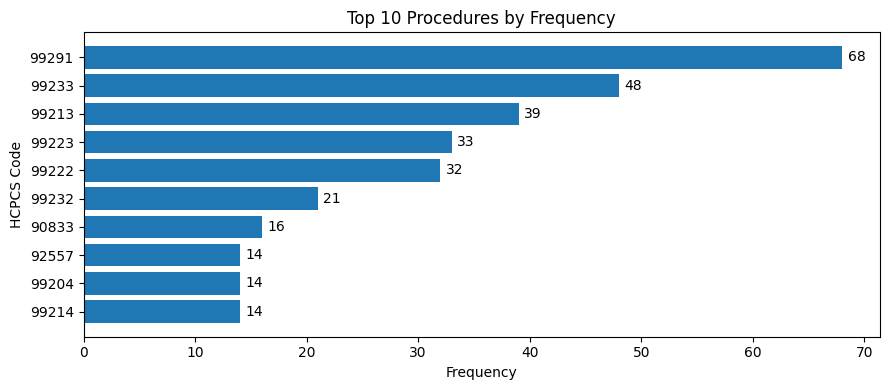

In [55]:
plt.figure(figsize=(9,4))
bars = plt.barh(
    top10_proc["HCPCS"].astype(str),
    top10_proc["frequency"]
)

plt.xlabel("Frequency")
plt.ylabel("HCPCS Code")
plt.title("Top 10 Procedures by Frequency")

plt.gca().invert_yaxis()

# Add frequency labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        va="center"
    )

plt.tight_layout()
plt.show()


#### Interpretation

The procedure mix is heavily weighted toward high-acuity inpatient services. HCPCS 99291 (Critical Care, Initial First Hour) is the most frequently billed procedure, which aligns with the prevalence of acute respiratory failure and other serious diagnoses. Initial and subsequent inpatient evaluation and management (E&M) codes are also common, consistent with the majority of claims being inpatient encounters. The presence of specialty procedures such as psychotherapy and audiometry reflects a diverse range of services, while telephone-based services indicate the use of modern care delivery models.

### Question 5: Service Location Analysis

In [56]:
pos_col = "Facility_Location"  # use this since it's clearly populated

pos_counts = (
    df_header[pos_col]
    .fillna("UNKNOWN")
    .value_counts()
    .reset_index()
)
pos_counts.columns = [pos_col, "claim_count"]
pos_counts["pct_of_claims"] = pos_counts["claim_count"] / pos_counts["claim_count"].sum() * 100

display(pos_counts)


,Facility_Location,claim_count,pct_of_claims
0,INPATIENT,231,59.536082
1,DOCTOR'S OFFICE,132,34.020619
2,OUTPATIENT HOSPITAL,14,3.608247
3,AMBULATORY SURGERY,10,2.577320
4,EMERGENCY,1,0.257732


In [57]:
inpatient_pct = (df_header[pos_col] == "INPATIENT").mean() * 100
office_pct = (df_header[pos_col] == "DOCTOR'S OFFICE").mean() * 100

print(f"% INPATIENT: {inpatient_pct:.2f}%")
print(f"% DOCTOR'S OFFICE: {office_pct:.2f}%")


% INPATIENT: 59.54%
% DOCTOR'S OFFICE: 34.02%


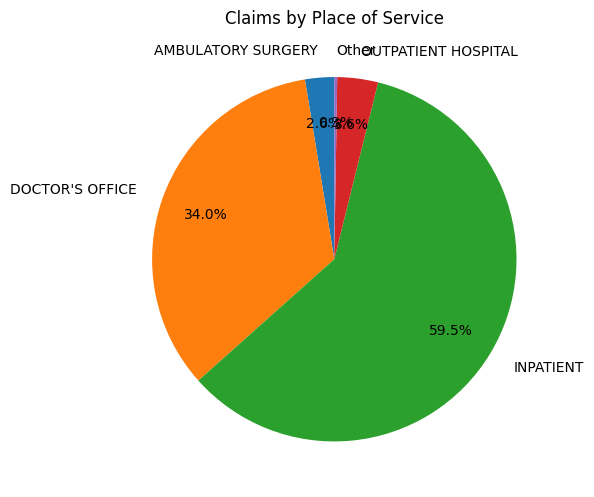

In [58]:
pos_counts_grouped = pos_counts.copy()

pos_counts_grouped.loc[
    pos_counts_grouped["pct_of_claims"] < 2, "Facility_Location"
] = "Other"

pos_counts_grouped = (
    pos_counts_grouped
    .groupby("Facility_Location", as_index=False)
    .agg({"claim_count": "sum"})
)

plt.figure(figsize=(6,6))

wedges, texts, autotexts = plt.pie(
    pos_counts_grouped["claim_count"],
    labels=pos_counts_grouped["Facility_Location"],
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.75,    # move percentages outward
    labeldistance=1.15   # move labels outward
)

plt.title("Claims by Place of Service")
plt.tight_layout()
plt.show()


#### Interpretation

Nearly 60% of claims are associated with inpatient hospital services, which is consistent with the high frequency of critical care procedures and surgical providers in the dataset. Approximately one-third of claims occur in office-based settings, likely representing outpatient follow-ups and routine care. Emergency department claims account for a very small proportion of the total, suggesting this dataset primarily reflects scheduled or admitted care rather than emergency-driven utilization.

## Part 3: Advanced Analysis with Joins

### Question 6: Claims with High Service Line Counts

In [59]:
# Merge LINE and HEADER (many-to-one)
hl = df_line.merge(
    df_header[
        ["ProspectiveClaimId", "BillingProviderName"]
    ],
    on="ProspectiveClaimId",
    how="left"
)

# Aggregate at the claim level
claim_line_summary = (
    hl.groupby(["ProspectiveClaimId", "BillingProviderName"])
      .agg(
          num_service_lines=("LinePos", "count"),
          total_charges=("Charges", "sum")
      )
      .reset_index()
)

# Filter claims with 5 or more service lines
high_line_claims = claim_line_summary[
    claim_line_summary["num_service_lines"] >= 5
].sort_values("num_service_lines", ascending=False)

display(high_line_claims)


,ProspectiveClaimId,BillingProviderName,num_service_lines,total_charges
151,36794825,SB CHILDREN'S SERVICE,7,1163
79,36668119,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,1030
125,36740402,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,6,945
109,36710175,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873
135,36757684,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,5,873


#### Interpretation

Only 5 claims (approximately 1.3% of all claims) contain five or more service lines, indicating that the majority of claims in this dataset involve relatively straightforward billing. OB/GYN providers account for four of these high–line-count claims, which likely represent comprehensive prenatal or postpartum encounters that include multiple bundled services. The remaining claim, associated with Children’s Services, includes seven service lines, suggesting a more complex pediatric encounter requiring multiple billed services.

### Question 7: Diagnosis–Procedure Combinations

In [60]:
# Identify claims with HCPCS 99291
critical_care_claims = df_line.loc[
    df_line["HCPCS"] == "99291",
    "ProspectiveClaimId"
].unique()

# Filter diagnoses to those claims
dx_99291 = df_code[
    df_code["ProspectiveClaimId"].isin(critical_care_claims)
]

# Count diagnosis frequencies
top_dx_99291 = (
    dx_99291["CodeValue"]
    .value_counts()
    .reset_index()
)
top_dx_99291.columns = ["ICD10_Code", "frequency"]

display(top_dx_99291.head(10))


,ICD10_Code,frequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I60.8,24
6,I10,24
7,I95.9,20
8,D72.829,19
9,I67.848,17


#### Interpretation

Among claims that include HCPCS 99291 (Critical Care, Initial First Hour), acute respiratory failure (J96.01) is the most frequently associated diagnosis, appearing in approximately 78% of critical care claims. Neurological emergency diagnoses, including brain compression and intracranial hemorrhage, also appear frequently, reflecting the presence of neurosurgical patients in the dataset. In addition, chronic conditions such as hyperlipidemia and anemia commonly appear as secondary diagnoses, highlighting the medical complexity often associated with critical care encounters.

### Question 8: Charges by Payer

In [61]:
# Total charges per claim
charges_per_claim = (
    df_line.groupby("ProspectiveClaimId")["Charges"]
    .sum()
    .reset_index(name="total_claim_charges")
)

# Merge payer info
claim_charges_payer = charges_per_claim.merge(
    df_header[["ProspectiveClaimId", "PrimaryPayerName"]],
    on="ProspectiveClaimId",
    how="left"
)

# Aggregate by payer
payer_charge_summary = (
    claim_charges_payer
    .groupby("PrimaryPayerName")
    .agg(
        total_charges=("total_claim_charges", "sum"),
        avg_charges_per_claim=("total_claim_charges", "mean"),
        num_claims=("ProspectiveClaimId", "nunique")
    )
    .reset_index()
    .sort_values("total_charges", ascending=False)
    .head(10)
)

display(payer_charge_summary)


,PrimaryPayerName,total_charges,avg_charges_per_claim,num_claims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


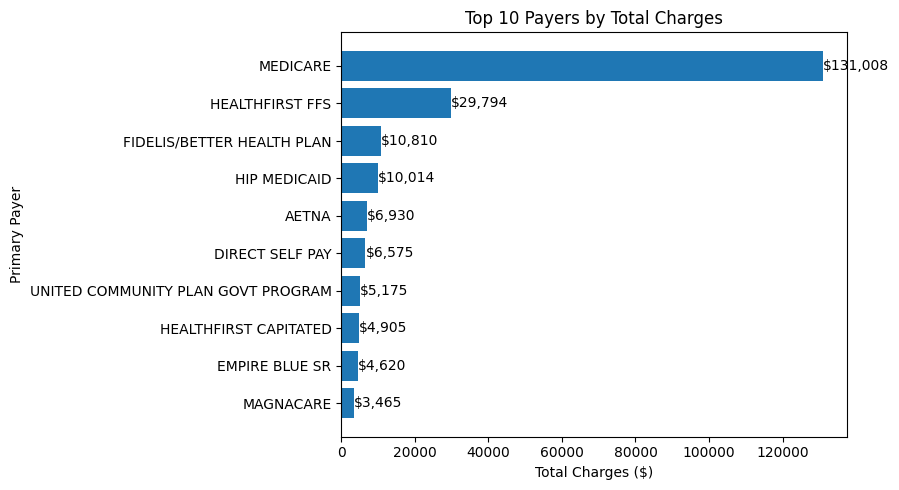

In [62]:
plt.figure(figsize=(9,5))

bars = plt.barh(
    payer_charge_summary["PrimaryPayerName"],
    payer_charge_summary["total_charges"]
)

plt.xlabel("Total Charges ($)")
plt.ylabel("Primary Payer")
plt.title("Top 10 Payers by Total Charges")

# Put largest payer at the top
plt.gca().invert_yaxis()

# Add dollar labels at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"${width:,.0f}",
        va="center",
        ha="left"
    )

plt.tight_layout()
plt.show()


#### Interpretation

Medicare generates the highest total charges (approximately $131,000), largely due to its high claim volume in the dataset. AETNA and Direct Self Pay show the highest average charges per claim (around $1,100), suggesting that commercially insured and self-pay patients may receive more complex or higher-reimbursement services on a per-claim basis. In contrast, Medicaid-related payers exhibit lower average charges per claim (approximately $200–$400), which likely reflects differences in reimbursement rates and service mix across payer types.

## Part 4: Creative Analysis

### Question 9: Provider-Level Case Complexity

In [63]:
# Count service lines per claim
dx_per_claim = (
    df_code
    .groupby("ProspectiveClaimId")["CodeValue"]
    .count()
    .reset_index(name="dx_count")
)

# Merge diagnosis counts with provider information
provider_dx = dx_per_claim.merge(
    df_header[["ProspectiveClaimId", "BillingProviderName"]],
    on="ProspectiveClaimId",
    how="left"
)

# Calculate average diagnoses per claim by provider
provider_complexity = (
    provider_dx
    .groupby("BillingProviderName")
    .agg(
        avg_dx_per_claim=("dx_count", "mean"),
        num_claims=("ProspectiveClaimId", "nunique")
    )
    .reset_index()
    .sort_values("avg_dx_per_claim", ascending=False)
)

provider_complexity_filtered = provider_complexity[
    provider_complexity["num_claims"] >= 5
]

provider_summary_table = (
    provider_complexity_filtered[
        ["BillingProviderName", "avg_dx_per_claim", "num_claims"]
    ]
    .rename(columns={
        "BillingProviderName": "Provider",
        "avg_dx_per_claim": "Avg Dx Codes",
        "num_claims": "Claim Count"
    })
    .round({"Avg Dx Codes": 2})
)

display(provider_summary_table)

,Provider,Avg Dx Codes,Claim Count
0,NEW YORK SPINE AND BRAIN SURGERY,9.23,69
3,SB INTERNISTS,3.59,152
1,SB CHILDREN'S SERVICE,3.33,9
6,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,2.12,40
5,SB SURGICAL ASSOCIATES,2.05,81
4,SB PSYCHIATRIC ASSOCIATES,1.81,36


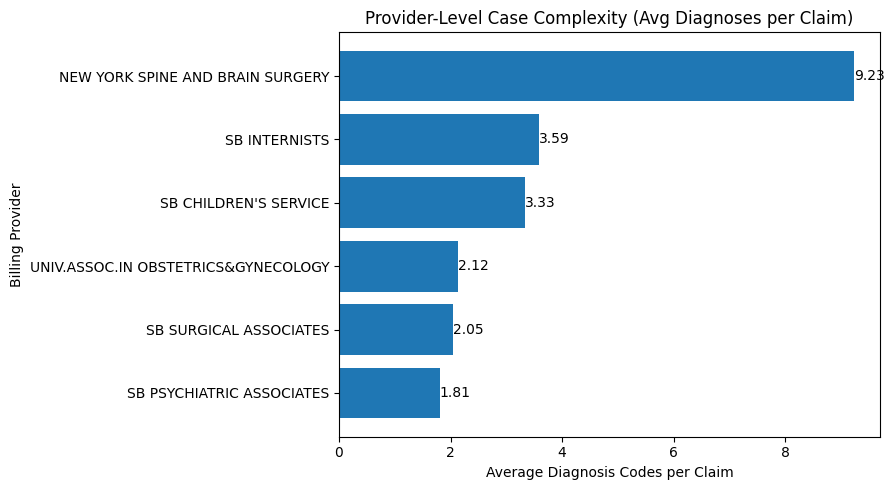

In [64]:
top_providers = provider_complexity_filtered.head(10)

plt.figure(figsize=(9,5))
bars = plt.barh(
    top_providers["BillingProviderName"],
    top_providers["avg_dx_per_claim"]
)

plt.xlabel("Average Diagnosis Codes per Claim")
plt.ylabel("Billing Provider")
plt.title("Provider-Level Case Complexity (Avg Diagnoses per Claim)")
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="left"
    )

plt.tight_layout()
plt.show()


#### Interpretation

New York Spine and Brain Surgery stands out dramatically with an average of 9.23 diagnosis codes per claim, which is more than double the next highest provider in the dataset. This pattern reflects several factors. First, neurosurgical cases are inherently complex, often involving multiple comorbid conditions. Second, many spine and brain surgery patients likely require critical care or ICU-level services, increasing the number of diagnoses documented. Finally, complex surgical procedures typically require thorough documentation to support medical necessity and reimbursement.

In contrast, Psychiatric Associates shows the lowest average diagnosis count (1.81 diagnoses per claim). This is expected, as mental health visits typically focus on primary psychiatric conditions with fewer medical comorbidities documented per encounter.

#### Recommendation:
The compliance team should prioritize documentation audits for high-complexity providers, particularly those with unusually high diagnosis counts per claim, to ensure all reported diagnoses are clinically supported and appropriately coded.